In [13]:
# import das bibliotecas

import numpy as np
import networkx as nx

import pandas as pd

import matplotlib . pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

# Métricas de centralidade

Considere um grafo $G =(V,E)$ onde $|V| = n$, $|E| = m$.

In [14]:
# grafo karate club
KCG = nx.karate_club_graph()

In [15]:
# imprime uma lista com os nós de g (karate club)
nodes_ = KCG.nodes()
print(f'nodes: {nodes_}')

# imprime uma lista com as arestas de g (karate club)
edges_ = KCG.edges()
print(f'arestas: {edges_}')

nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
arestas: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [16]:
n = nx.number_of_nodes(KCG) # número de nos
m = nx.number_of_edges(KCG) # número de arestas

print(f"numero de nos: {n}")
print(f"numero de arestas: {m}")

numero de nos: 34
numero de arestas: 78


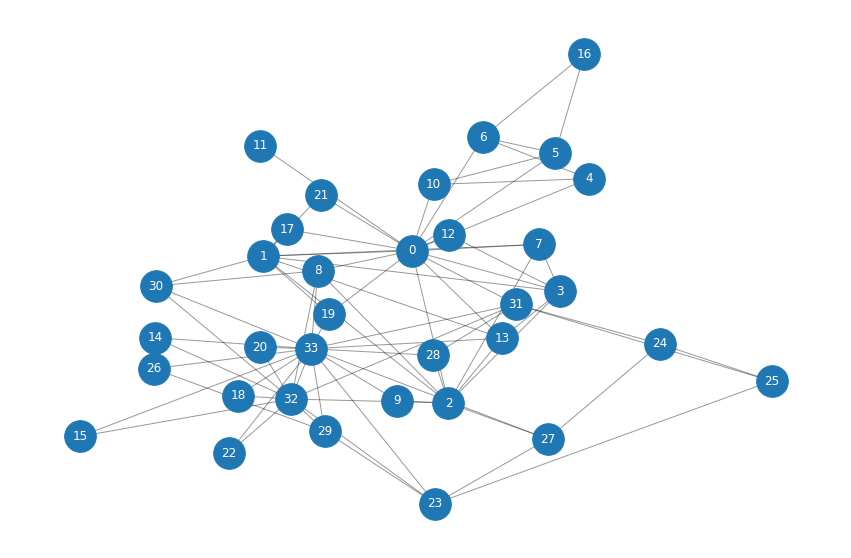

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
#pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
#plt.savefig('KCG.png', transparent=True, dpi=300)
plt.show()

### Grau de centralidade

A métrica de **grau** refere-se ao número de links de cada nó da rede. 

**nx.degree()**: função do networkx que retorna o grau cada nó da rede.

In [18]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(KCG))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}
1 : 11, 
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
16 : 0, 
17 : 33, 


In [19]:
# rank em relacao ao grau

ranks = [(k, v) for k, v in sorted(dic_grau.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5)]

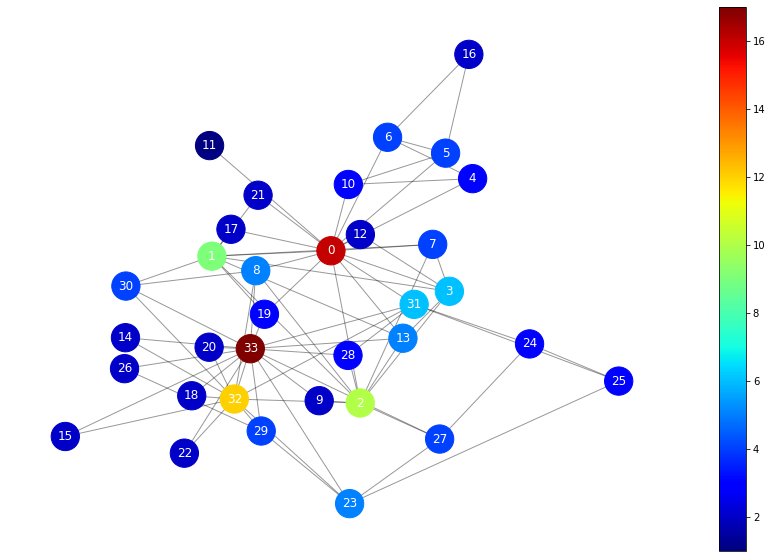

In [20]:
# grafico com graus

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# define a cor do nos
color = list(dic_grau.values())

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

A métrica de **grau de centralidade** atribui uma pontuação(fração) de importância com base no número de links mantido por cada nó.

Essa métrica nos fala o quanto direto é a conexão de um nó com os outros nós da rede.

A métrica **grau de centralidade** do nó $i$ é dado pela fórmula $\dfrac{grau(i)}{|V|}$ para cada $i \in V$.

**nx.degree_centrality()**: função do networkx que retorna o grau de centralidade de cada nó da rede.

In [21]:
# grau de centralidade dos nodes da rede

dic_grau_center = nx.degree_centrality(KCG)
val_grau_center = dic_grau_center.values()

set_grau_center = set(dic_grau_center.values())

for i in set_grau_center:
    print(i, end= " : ")
    for key, value in dic_grau_center.items():
        if i == dic_grau_center[key]:
            print(key, end=", ")
    print()

0.48484848484848486 : 0, 
0.2727272727272727 : 1, 
0.30303030303030304 : 2, 
0.18181818181818182 : 3, 31, 
0.09090909090909091 : 4, 10, 19, 24, 25, 28, 
0.12121212121212122 : 5, 6, 7, 27, 29, 30, 
0.15151515151515152 : 8, 13, 23, 
0.06060606060606061 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
0.030303030303030304 : 11, 
0.36363636363636365 : 32, 
0.5151515151515151 : 33, 


In [22]:
# rank em relacao a centralidade de grau

ranks = [(k, v) for k, v in sorted(dic_grau_center.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152)]

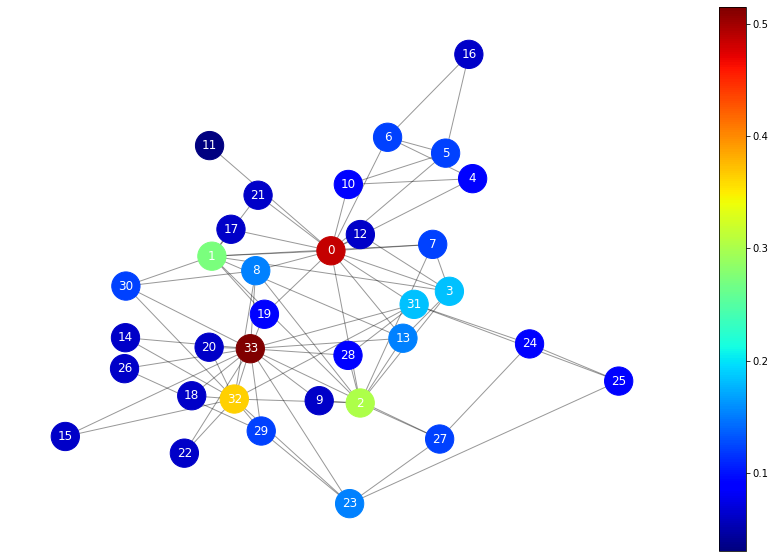

In [23]:
# grau de centralidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_grau_center)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

## Métricas geométricas

### Centralidade de excentricidade

Seja $G_i = (V_i,E_i)$ uma componente conexa de $G$ que contém o nó $i \in V$

A **excentricidade** do nó $i \in G_i$ é a maior distância geodésica de um $i$ aos demais nós de $G_i$. 

A **excentricidade** do nó $i$ é dado pela fórmula 
$$
ec(i) = \max_{j \in V_i} d(i,j) \; \forall \; i \in V_i
$$
onde $d(i,j)$ é o tamanho da distância geodésica do nó $i$ para o nó $j \in V_i$.

O **diâmetro** de um grafo é sua maior excentrecidade.
Maior distância geodésica(shortest path) entre dois nós em uma mesma componente.

A **periferia** de um grafo é o conjunto de todos os nós cujo a excentricidade é igual ao diâmetro.

O **raio** de um grafo é sua menor excentricidade.

O **centro** de um grafo é o conjunto de nós cujo valor da excentricidade é igual ao raio.

Funções do NetworkX:
- **nx.eccentricity()**: retorna a excentricidade de um grafo.
- **nx.diameter()**: retorna o diâmetro de um grafo.
- **nx.periphery()**: retorna a periferia de um grafo.
- **nx.radius()**: retorna o raio de um grafo.
- **nx.center()**: retorna o centro de um grafo.

In [24]:
## Verifica se o grafo é conexo
print(nx.is_connected(KCG))

True


In [25]:
# Encontra as distâncias geodésica(sp)
p = nx.shortest_path(KCG)
for key, value in p.items():
    print(f"sp partindo de {key}: {value}")

sp partindo de 0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 10: [0, 10], 11: [0, 11], 12: [0, 12], 13: [0, 13], 17: [0, 17], 19: [0, 19], 21: [0, 21], 31: [0, 31], 30: [0, 1, 30], 9: [0, 2, 9], 27: [0, 2, 27], 28: [0, 2, 28], 32: [0, 2, 32], 16: [0, 5, 16], 33: [0, 8, 33], 24: [0, 31, 24], 25: [0, 31, 25], 23: [0, 2, 27, 23], 14: [0, 2, 32, 14], 15: [0, 2, 32, 15], 18: [0, 2, 32, 18], 20: [0, 2, 32, 20], 22: [0, 2, 32, 22], 29: [0, 2, 32, 29], 26: [0, 8, 33, 26]}
sp partindo de 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 13: [1, 13], 17: [1, 17], 19: [1, 19], 21: [1, 21], 30: [1, 30], 4: [1, 0, 4], 5: [1, 0, 5], 6: [1, 0, 6], 8: [1, 0, 8], 10: [1, 0, 10], 11: [1, 0, 11], 12: [1, 0, 12], 31: [1, 0, 31], 9: [1, 2, 9], 27: [1, 2, 27], 28: [1, 2, 28], 32: [1, 2, 32], 33: [1, 13, 33], 16: [1, 0, 5, 16], 24: [1, 0, 31, 24], 25: [1, 0, 31, 25], 23: [1, 2, 27, 23], 14: [1, 2, 32, 14], 15: [1, 2, 32, 15], 18: [1, 2, 32, 18], 20:

In [26]:
# calculo do tamanhos da distâncias geodésica(sp) do grafo

d = np.zeros((n,n), dtype=int)
for i in KCG:
    sp = nx.shortest_path_length(KCG,i)

    for key, value in sp.items():
        d[i,key] = value

    for key, value in sp.items():
        if i<key:
            print(f"sp[{i},{key}]: {d[i,key]}")

sp[0,1]: 1
sp[0,2]: 1
sp[0,3]: 1
sp[0,4]: 1
sp[0,5]: 1
sp[0,6]: 1
sp[0,7]: 1
sp[0,8]: 1
sp[0,10]: 1
sp[0,11]: 1
sp[0,12]: 1
sp[0,13]: 1
sp[0,17]: 1
sp[0,19]: 1
sp[0,21]: 1
sp[0,31]: 1
sp[0,9]: 2
sp[0,16]: 2
sp[0,24]: 2
sp[0,25]: 2
sp[0,27]: 2
sp[0,28]: 2
sp[0,30]: 2
sp[0,32]: 2
sp[0,33]: 2
sp[0,14]: 3
sp[0,15]: 3
sp[0,18]: 3
sp[0,20]: 3
sp[0,22]: 3
sp[0,23]: 3
sp[0,26]: 3
sp[0,29]: 3
sp[1,2]: 1
sp[1,3]: 1
sp[1,7]: 1
sp[1,13]: 1
sp[1,17]: 1
sp[1,19]: 1
sp[1,21]: 1
sp[1,30]: 1
sp[1,4]: 2
sp[1,5]: 2
sp[1,6]: 2
sp[1,8]: 2
sp[1,9]: 2
sp[1,10]: 2
sp[1,11]: 2
sp[1,12]: 2
sp[1,27]: 2
sp[1,28]: 2
sp[1,31]: 2
sp[1,32]: 2
sp[1,33]: 2
sp[1,14]: 3
sp[1,15]: 3
sp[1,16]: 3
sp[1,18]: 3
sp[1,20]: 3
sp[1,22]: 3
sp[1,23]: 3
sp[1,24]: 3
sp[1,25]: 3
sp[1,26]: 3
sp[1,29]: 3
sp[2,32]: 1
sp[2,3]: 1
sp[2,7]: 1
sp[2,8]: 1
sp[2,9]: 1
sp[2,13]: 1
sp[2,27]: 1
sp[2,28]: 1
sp[2,4]: 2
sp[2,5]: 2
sp[2,6]: 2
sp[2,10]: 2
sp[2,11]: 2
sp[2,12]: 2
sp[2,14]: 2
sp[2,15]: 2
sp[2,17]: 2
sp[2,18]: 2
sp[2,19]: 2
sp[2,20]: 2
sp[2

In [27]:
# calculo da excentricidade

dic_ec  = nx.eccentricity(KCG)
val_ec  = list(dic_ec.values())

set_ec = set(dic_ec.values())
print(f"EC = {set_ec}")

for i in set_ec:
    print(f"{i}", end= " : ")
    for key, value in dic_ec.items():
        if i == dic_ec[key]:
            print(f"{key}", end=", ")
    print()

EC = {3, 4, 5}
3 : 0, 1, 2, 3, 8, 13, 19, 31, 
4 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
5 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [28]:
# rank em relacao a excentricidade

ranks = [(k, v) for k, v in sorted(dic_ec.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(14, 5),
 (15, 5),
 (16, 5),
 (18, 5),
 (20, 5),
 (22, 5),
 (23, 5),
 (26, 5),
 (29, 5),
 (4, 4)]

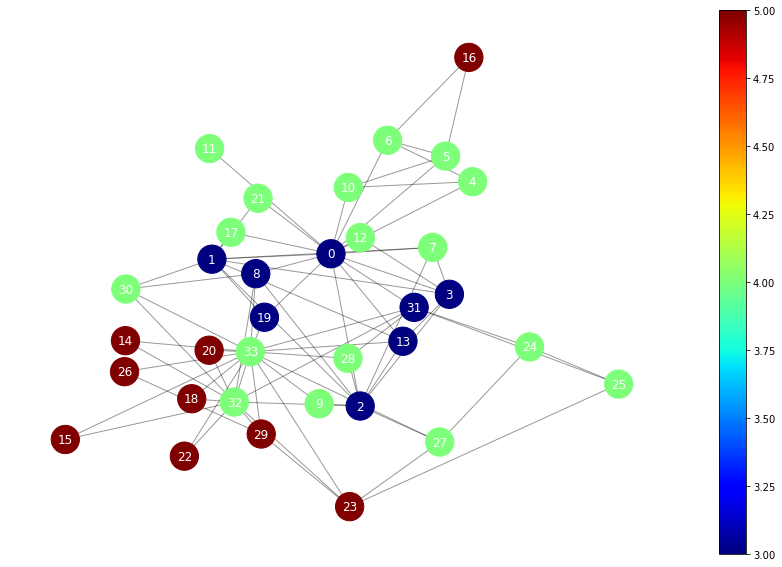

In [29]:
# grafico da excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_ec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [30]:
# the diameter of networks is the maximum eccentricy
diameter = nx.diameter(KCG)
print(f"Diametro de G: {diameter}")

Diametro de G: 5


In [31]:
# whom are in the diameter
diameter_set= [k for k,v in nx.eccentricity(KCG).items() if v == nx.diameter(KCG)]
print(f"Nós com diametro {diameter}: {diameter_set}")

Nós com diametro 5: [14, 15, 16, 18, 20, 22, 23, 26, 29]


In [32]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
periphery = nx.periphery(KCG)
print(f"Periferia da rede: {periphery}")

Periferia da rede: [14, 15, 16, 18, 20, 22, 23, 26, 29]


In [33]:
# the radius of a network is the minimum eccentricity
radius = nx.radius(KCG)
print(f"Raio da rede: {radius}")

Raio da rede: 3


In [34]:
# whom are in the radius
radius_set = [k for k,v in nx.eccentricity(KCG).items() if v == radius]
print(f"Nós com raio {radius}: {radius_set}")

Nós com raio 3: [0, 1, 2, 3, 8, 13, 19, 31]


In [35]:
# the center of a network is a set all nodes whose eccentricity equal the radius
center = nx.center(KCG)
print(f"Centro da rede: {center}")

Centro da rede: [0, 1, 2, 3, 8, 13, 19, 31]


### Centralidade de excentricidade

A **centralidade de excentricidade** garante que os nós centrais estão mais próximos dos outros.

A **centralidade de excentricidade** no nó $i$ é dado pela fórmula
$$
cec(i) = \dfrac{1}{ec(i)} \; \forall \; i \in V_i
$$

In [36]:
# calculo da centralidade de excentricidade

dic_cec = {}
for key, value in dic_ec.items():
    dic_cec[key] = 1.0/value

val_cec = list(dic_cec.values())

In [37]:
set_cec = set(dic_cec.values())
print(f"CEC = {set_cec}")

for i in set_cec:
    print(f"{i}", end= " : ")
    for key, value in dic_cec.items():
        if i == dic_cec[key]:
            print(f"{key}", end=", ")
    print()

CEC = {0.3333333333333333, 0.25, 0.2}
0.3333333333333333 : 0, 1, 2, 3, 8, 13, 19, 31, 
0.25 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
0.2 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [38]:
# rank em relacao a centralidade de excentricidade

ranks = [(k, v) for k, v in sorted(dic_cec.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.3333333333333333),
 (1, 0.3333333333333333),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (13, 0.3333333333333333),
 (19, 0.3333333333333333),
 (31, 0.3333333333333333),
 (4, 0.25),
 (5, 0.25)]

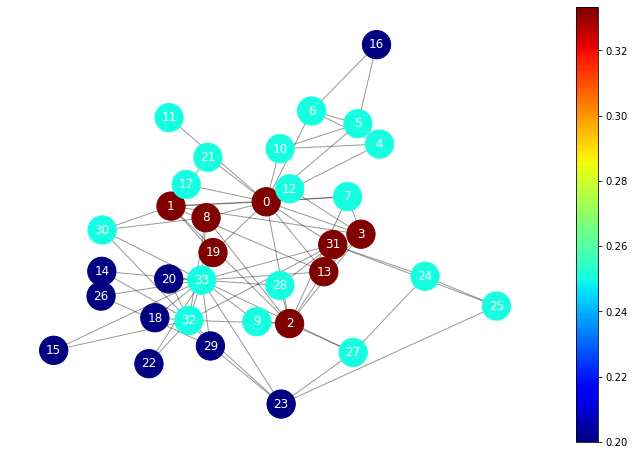

In [39]:
# grafico da centralidade de excentricidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('cec.png', transparent=True,dpi=300)
plt.show()

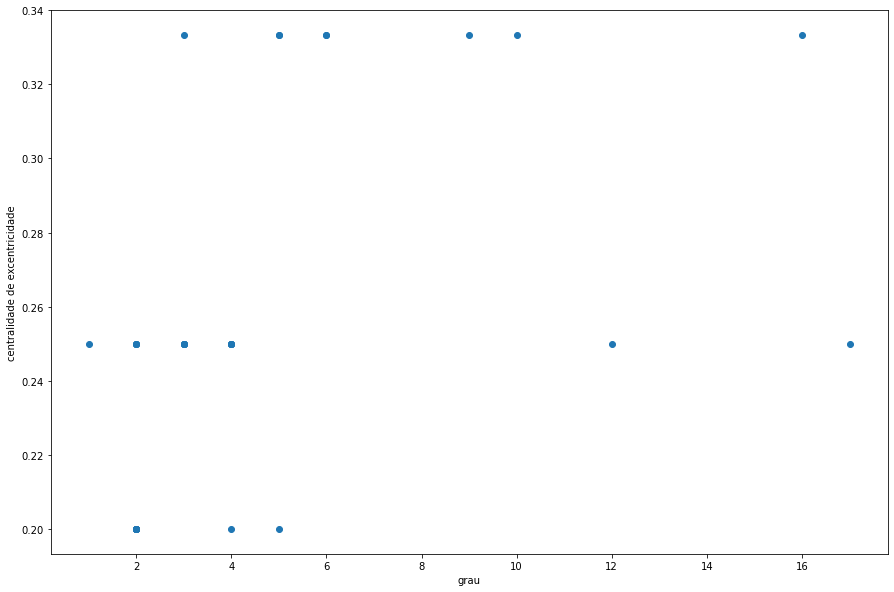

In [40]:
# grau x centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(val_grau, val_cec, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de excentricidade')
plt.show()

### Centralidade de proximidade

- A **centralidade de proximidade** pontua cada nó com base em sua **proximidade** com todos os outros nós da rede.

- Esta medida calcula os caminhos mais curtos entre todos os nós e, em seguida, atribui a cada nó uma pontuação com base na soma dos caminhos mais curtos.

- Podemos usar essa medida para encontrar os nós que estão em melhor posição para influenciar toda a rede mais rapidamente.

- A **centralidade de proximidade** do nó $i$ é igual ao reciproco da média aritmética das distâncias geodésicas do nó $i$ para os demais nós $j$ da mesma componente do nó $i$, ou seja
$$
C_{c}(i) = \dfrac{|V_i| - 1}{\sum_{j \in {V_i - \{i\}}} d(i,j)} \; \forall \; i \in V_i
$$

- **nx.closeness_centrality()**: função do networkx que retorna a centralidade de proximidade de cada nó da rede.

In [41]:
# calculo da centralidade de proximidade

dic_cc  = nx.closeness_centrality(KCG)
val_cc  = list(dic_cc.values())

set_cc = set(val_cc)

for i in set_cc:
    print(i, end= " : ")
    for key, value in dic_cc.items():
        if i == dic_cc[key]:
            print(key, end=", ")
    print()

0.5689655172413793 : 0, 
0.559322033898305 : 2, 
0.3793103448275862 : 4, 10, 
0.4852941176470588 : 1, 
0.4647887323943662 : 3, 
0.38372093023255816 : 5, 6, 29, 
0.44 : 7, 
0.515625 : 8, 13, 32, 
0.4342105263157895 : 9, 
0.36666666666666664 : 11, 
0.375 : 17, 21, 24, 25, 
0.5 : 19, 
0.4520547945205479 : 28, 
0.39285714285714285 : 23, 
0.28448275862068967 : 16, 
0.55 : 33, 
0.4583333333333333 : 27, 30, 
0.3626373626373626 : 26, 
0.5409836065573771 : 31, 
0.3707865168539326 : 12, 14, 15, 18, 20, 22, 


In [42]:
# rank em relacao a centralidade de proximidade

ranks = [(k, v) for k, v in sorted(dic_cc.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

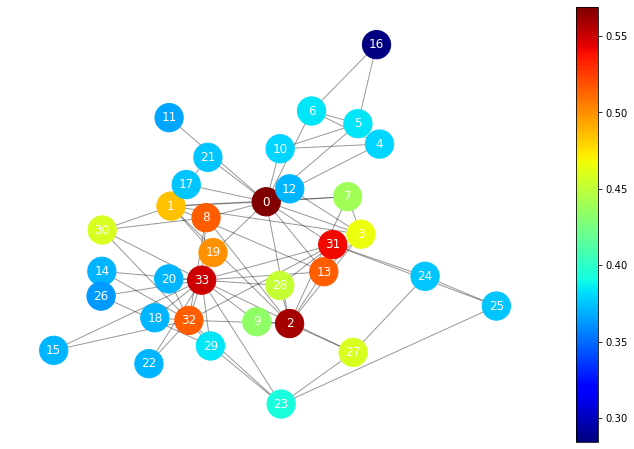

In [43]:
# grafico da centralidade de proximidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cc)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('closeness_centrality.png', transparent=True,dpi=300)
plt.show()

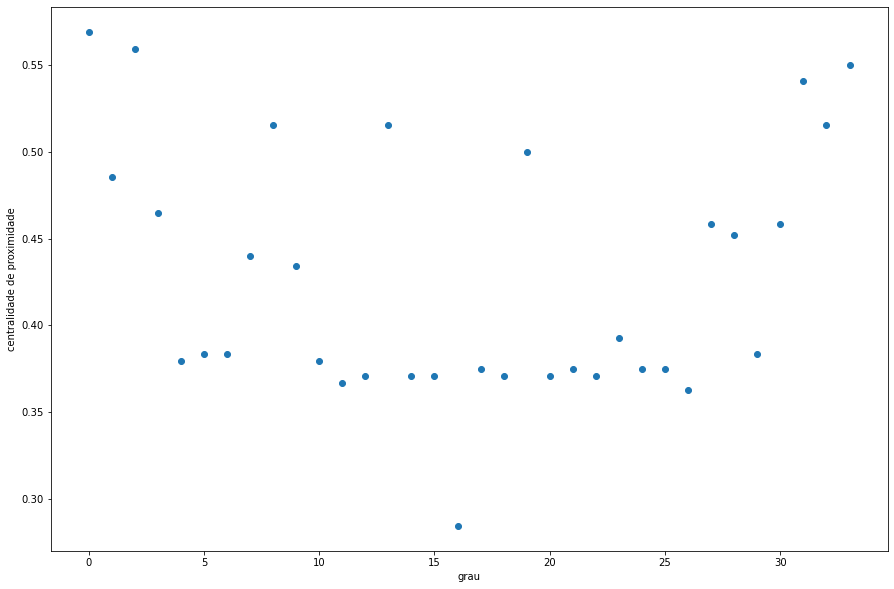

In [44]:
# grau x centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(nodes_, val_cc, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de proximidade')
plt.show()

### Centralidade harmônica

- Na **centralidade harmônica** a média aritmética das distâncias presente na **centralidade de proximidade** é substituida pela **média harmônica** das mesmas em que nós pertencentes a componentes distintas possuem distâncias infinitas entre si, ou seja,
$$
C_h(i) = \dfrac{1}{n-1} \left[ \sum_{j\not=i} \dfrac{1}{d(i,j)} \right] \; \forall \; i \in V
$$

- **nx.harmonic_centrality()**: função do networkx que retorna o centralidade harmônica de cada nó da rede, sem normalizar(sem dividor por $n-1$).

- A **centralidade harmônica** contorna o problema de redes com mais de uma componente conexas, onde temos distâncias geodésicas infinitas.

In [45]:
# calculo da centralidade harmonica

dic_chu = nx.harmonic_centrality(KCG)
val_chu = list(nx.harmonic_centrality(KCG).values())

set_chu = set(val_chu)
#print(f"CHU = {len(set_chu)}")

for i in set_chu:
    print(i, end= " : ")
    for key, value in dic_chu.items():
        if i == dic_chu[key]:
            print(key, end=", ")
    print()

11.099999999999996 : 16, 
13.916666666666666 : 24, 
13.916666666666664 : 25, 
13.950000000000001 : 26, 
14.200000000000003 : 14, 15, 18, 20, 22, 
14.16666666666667 : 17, 21, 
13.500000000000004 : 11, 
14.66666666666667 : 4, 10, 
15.16666666666667 : 5, 6, 
16.41666666666667 : 7, 
17.66666666666667 : 3, 
18.5 : 8, 13, 
19.16666666666667 : 1, 
21.0 : 2, 
23.16666666666666 : 0, 
19.333333333333336 : 31, 
20.916666666666668 : 32, 
23.25 : 33, 
14.000000000000004 : 12, 
15.583333333333334 : 9, 
15.366666666666669 : 29, 
16.033333333333335 : 23, 
16.916666666666664 : 27, 
16.416666666666664 : 28, 
16.916666666666668 : 30, 
17.5 : 19, 


In [46]:
# rank em relacao a centralidade harmonica

ranks = [(k, v) for k, v in sorted(dic_chu.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 23.25),
 (0, 23.16666666666666),
 (2, 21.0),
 (32, 20.916666666666668),
 (31, 19.333333333333336),
 (1, 19.16666666666667),
 (8, 18.5),
 (13, 18.5),
 (3, 17.66666666666667),
 (19, 17.5)]

In [47]:
# centraliade harmonica normalizada

#chn = [x/(len(val_chu)-1) for x in val_chu]  # normalização

# normalizacao
dic_chn = {}
for key, value in dic_chu.items():
    dic_chn[key] = value/(n-1)
    #dic_chn[key] = chn[key]

val_chn = list(dic_chn.values())

set_chn = set(val_chn)

for i in set_chn:
    print(i, end= " : ")
    for key, value in dic_chn.items():
        if i == dic_chn[key]:
            print(key, end=", ")
    print()

0.7020202020202019 : 0, 
0.580808080808081 : 1, 
0.44444444444444453 : 4, 10, 
0.5353535353535355 : 3, 
0.6363636363636364 : 2, 
0.45959595959595967 : 5, 6, 
0.4974747474747476 : 7, 
0.5606060606060606 : 8, 13, 
0.47222222222222227 : 9, 
0.40909090909090917 : 11, 
0.4974747474747474 : 28, 
0.33636363636363625 : 16, 
0.4292929292929294 : 17, 21, 
0.42171717171717166 : 25, 
0.4217171717171717 : 24, 
0.42424242424242437 : 12, 
0.4303030303030304 : 14, 15, 18, 20, 22, 
0.4227272727272728 : 26, 
0.48585858585858593 : 23, 
0.5303030303030303 : 19, 
0.585858585858586 : 31, 
0.5126262626262625 : 27, 
0.7045454545454546 : 33, 
0.4656565656565657 : 29, 
0.5126262626262627 : 30, 
0.6338383838383839 : 32, 


In [48]:
# rank em relacao a centralidade harmonica normalizada

ranks = [(k, v) for k, v in sorted(dic_chn.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.7045454545454546),
 (0, 0.7020202020202019),
 (2, 0.6363636363636364),
 (32, 0.6338383838383839),
 (31, 0.585858585858586),
 (1, 0.580808080808081),
 (8, 0.5606060606060606),
 (13, 0.5606060606060606),
 (3, 0.5353535353535355),
 (19, 0.5303030303030303)]

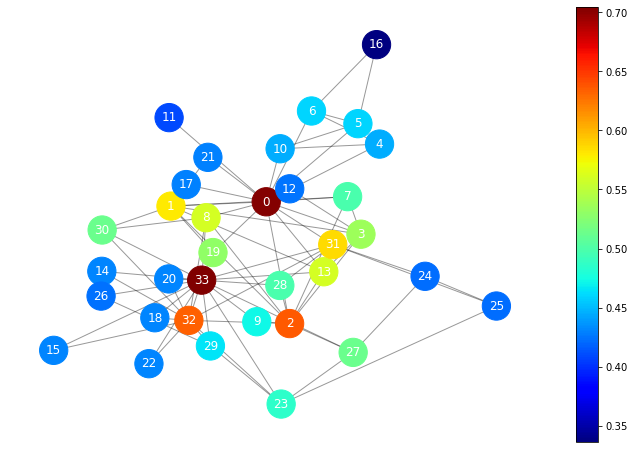

In [49]:
# gráfico da centralidade harmonica normalizada

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = val_chn

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

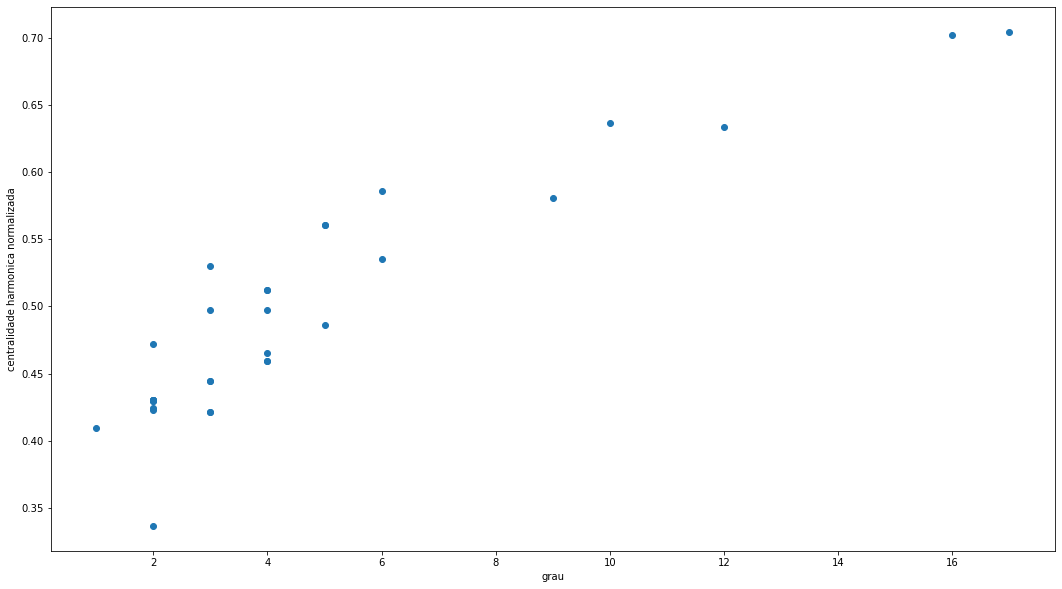

In [50]:
# grau x centralidade harmonica normalizada

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_chn , 'o')
plt.xlabel('grau')
plt.ylabel('centralidade harmonica normalizada')
plt.show()


### Centralidade de p-média

- A **centralidade de p-média** usa a noção de média generalizadas das distâncias.

- A **centralidade de p-média** generaliza as três médias anteriores: excentricidade, proximidade e harmônica.

- Fórmula da **centralidade de p-média**:

\begin{equation*}
C_{p}(i) = \left\{
\begin{matrix}
\left( \dfrac{\sum_{j \in  V_{i}-\{i\}} d(i,j)^p}{n-1} \right)^{\dfrac{-1}{p}}, \; se \; p \not= 0 \\
\left( \prod_{j \in V_{i}-\{i\}} d(i,j) \right)^{\dfrac{-1}{n-1}}, \; se \; p = 0 \\
\end{matrix}
\right.
\end{equation*}

In [51]:
# centralidade generalizada

n = KCG.number_of_nodes()

# valores de p
# linspace is an in-built function in Python's NumPy library. 
# It is used to create an evenly spaced sequence in a specified interval.
p = np.linspace(-1,1,n)

# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(KCG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros(n)
for k in range(n):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(n - 1))

In [52]:
print(p)

[-1.         -0.93939394 -0.87878788 -0.81818182 -0.75757576 -0.6969697
 -0.63636364 -0.57575758 -0.51515152 -0.45454545 -0.39393939 -0.33333333
 -0.27272727 -0.21212121 -0.15151515 -0.09090909 -0.03030303  0.03030303
  0.09090909  0.15151515  0.21212121  0.27272727  0.33333333  0.39393939
  0.45454545  0.51515152  0.57575758  0.63636364  0.6969697   0.75757576
  0.81818182  0.87878788  0.93939394  1.        ]


In [53]:
print(sp)

[0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3]


In [54]:
print(nx.shortest_path(KCG,1))

{1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 13: [1, 13], 17: [1, 17], 19: [1, 19], 21: [1, 21], 30: [1, 30], 4: [1, 0, 4], 5: [1, 0, 5], 6: [1, 0, 6], 8: [1, 0, 8], 10: [1, 0, 10], 11: [1, 0, 11], 12: [1, 0, 12], 31: [1, 0, 31], 9: [1, 2, 9], 27: [1, 2, 27], 28: [1, 2, 28], 32: [1, 2, 32], 33: [1, 13, 33], 16: [1, 0, 5, 16], 24: [1, 0, 31, 24], 25: [1, 0, 31, 25], 23: [1, 2, 27, 23], 14: [1, 2, 32, 14], 15: [1, 2, 32, 15], 18: [1, 2, 32, 18], 20: [1, 2, 32, 20], 22: [1, 2, 32, 22], 29: [1, 2, 32, 29], 26: [1, 13, 33, 26]}


In [55]:
print(nx.shortest_path_length(KCG,1))

{1: 0, 0: 1, 2: 1, 3: 1, 7: 1, 13: 1, 17: 1, 19: 1, 21: 1, 30: 1, 4: 2, 5: 2, 6: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 27: 2, 28: 2, 31: 2, 32: 2, 33: 2, 14: 3, 15: 3, 16: 3, 18: 3, 20: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 29: 3}


In [56]:
set_cp = set(cp)
#print("set_cp: ", set_cp)

for i in set_cp:
    print(i, end= " : ")
    for key in range(len(cp)):
        if i == cp[key]:
            print(key, end=", ")
    print()

#for i in range(len(cp)):
#    print(f"cp node {i} :  {cp[i]}")

0.5808080808080809 : 0, 
0.5773649074347137 : 1, 
0.5739428328326334 : 2, 
0.5705436669457304 : 3, 
0.5671691688048112 : 4, 
0.5638210410716109 : 5, 
0.5605009249290044 : 6, 
0.557210395355349 : 7, 
0.5539509568162438 : 8, 
0.5507240394018958 : 9, 
0.5475309954328849 : 10, 
0.5204996536712873 : 19, 
0.4993328699567602 : 27, 
0.48980118558245106 : 31, 
0.5262242941714637 : 17, 
0.5043613004318304 : 25, 
0.5069415512364585 : 24, 
0.5443730965514806 : 11, 
0.5381674032613998 : 13, 
0.4852941176470588 : 33, 
0.5412515313099311 : 12, 
0.5321154400196955 : 15, 
0.5095658040992932 : 23, 
0.4968845585438002 : 28, 
0.49447999254880154 : 29, 
0.4921189574284908 : 30, 
0.5018250846846161 : 26, 
0.5122339557484754 : 22, 
0.48752635995819854 : 32, 
0.51770117276051 : 20, 
0.5351217295535942 : 14, 
0.529149376756068 : 16, 
0.5149458295731395 : 21, 
0.5233408594881189 : 18, 


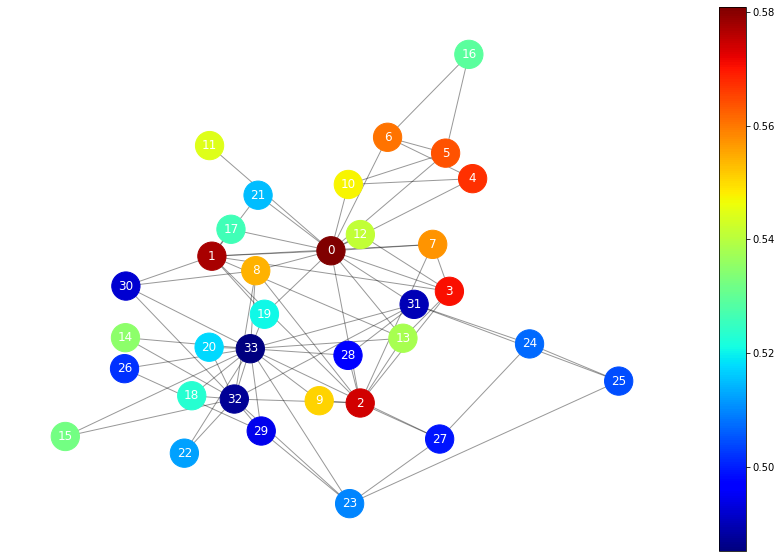

In [57]:
# centralidade generalizada

fig, ax = plt.subplots(1,1,figsize=(15,10))

# rede
G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### Centralidade de intermediação

- A **centralidade de intermediação** quantifica o quanto os vértices são capazes de atuar como intermediários entre outros dois vértices, podendo portanto controlar o fluxo de informação entre eles.

- $Q_{j,k}$: número de caminhos geodésicos iniciando no vértice $j$ e terminando no vértice $k$.

- $Q_{j,k}(i)$: número de caminhos geodésicos que iniciam em $j$, terminam em $k$ e passam pelo vértice $i$.

- $\dfrac{Q_{j,k}(i)}{Q_{j,k}}$: determina a importância do vértice $i$ para a conexão entre $j$ e $k$. Quanto maioro valor, maior é a importância do vértice $i$ para a conexão entre $j$ e $k$.

- Fórmula da centralidade por intermediação

$$
C_{b}(i) = \dfrac{1}{(n-1)(n-2)} \left[ \sum_{(j,k):j\not=k, i \not\in \{ j,k\}} \dfrac{Q_{j,k}(i)}{Q_{j,k}} \right] \; \forall \; i \in V
$$

- Função do networkx: **nx.betweenness_centrality()**

In [58]:
# calculo da centralidade de intermediação 

dic_cb = nx.betweenness_centrality(KCG, normalized=True)
val_cb = list(dic_cb.values())

set_cb = set(dic_cb.values())
#print("set_cb: ", set_cb)

for i in set_cb:
    print(i, end= " : ")
    for key, value in dic_cb.items():
        if i == dic_cb[key]:
            print(key, end=", ")
    print()

0.43763528138528146 : 0, 
0.0 : 7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
0.30407497594997596 : 33, 
0.0017947330447330447 : 28, 
0.0038404882154882154 : 25, 
0.053936688311688304 : 1, 
0.011909271284271283 : 3, 
0.02233345358345358 : 27, 
0.03247504810004811 : 19, 
0.14365680615680618 : 2, 
0.05592682780182781 : 8, 
0.0008477633477633478 : 9, 
0.13827561327561325 : 31, 
0.145247113997114 : 32, 
0.017613636363636363 : 23, 
0.014411976911976909 : 30, 
0.029987373737373736 : 6, 
0.04586339586339586 : 13, 
0.0006313131313131313 : 4, 10, 
0.02998737373737374 : 5, 
0.0029220779220779218 : 29, 
0.0022095959595959595 : 24, 


In [59]:
# rank em relacao a centralidade de autovetor

ranks = [(k, v) for k, v in sorted(dic_cb.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

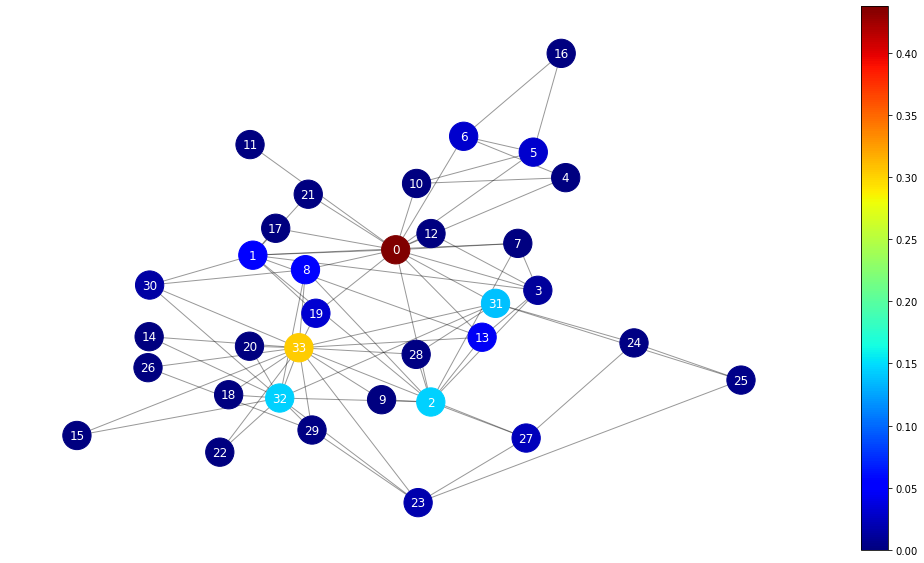

In [60]:
# gráfico da centralidade de intermediação 

G = KCG

fig, ax = plt.subplots(1,1,figsize=(18,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cb)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

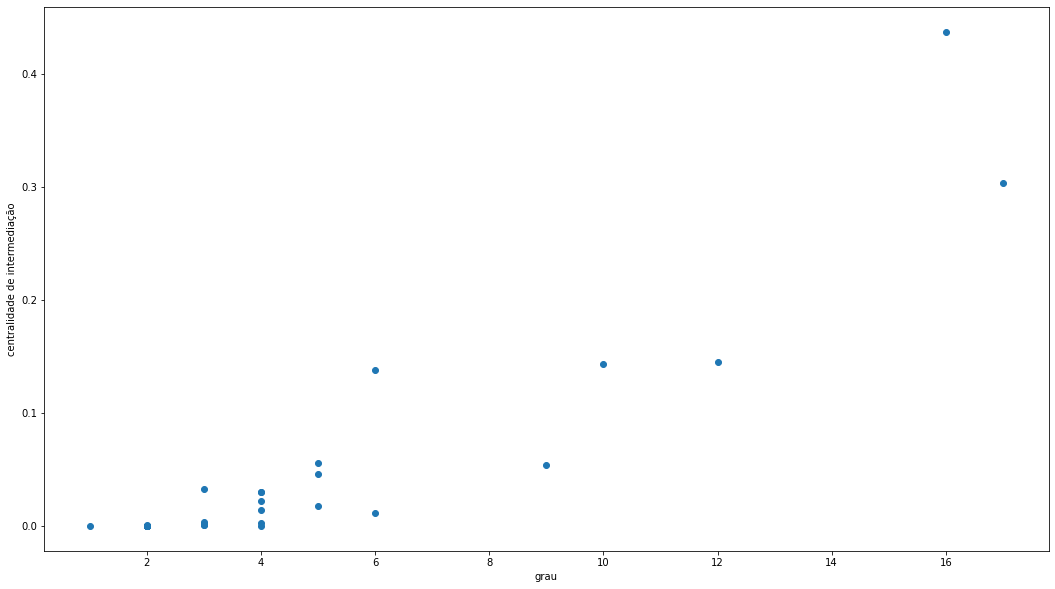

In [61]:
# grau x centralidade de intermediacao

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_cb, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de intermediação')
plt.show()

### k-shell

- O valor do **k-shell** está relacionado com a centralidade de grau dos nós e consiste na decomposição da rede em camadas.

- Os nós que possuem grau zero são nós isolados, constituem a camada $0$ da rede.

- Os nós que possuem grau $k$, fazem parte da camada $k$ da rede.

- O maior valor de camada de uma rede é denotado por **kmax** e é também uma medida global da rede. 

- A união de todos os nós que fazem parte de uma camada maior ou igual a $k$ constitui o **$k$-core** da rede.

- A união de todos os nós que fazem parte de uma camada menor ou igual a $k$ constitui o **$k$-crust** da rede. 

Funções do networkx:

- **nx.core_number()**: retorna o índice de shell de cada nó, isto é, o número do maior k-core que cada nó pertence.

- **nx.k_shell()**: retorna o subgrafo com os nós em um $k$-shell.

- **nx.k_core()**: retorna o subgrafo com todos os nós em um $k$-core.

 - **nx.k_crust()**: retorna o subgrafo com todos os nós em um $k$-crust.

In [50]:
# calculo dos cores de cada no

dic_core = nx.core_number(KCG)
val_core = list(dic_core.values())

set_core = set(dic_core.values())
print(f"Core = {set_core}")

for i in set_core:
    print(i, end= " : ")
    for key, value in dic_core.items():
        if i == dic_core[key]:
            print(key, end=", ")
    print()

Core = {1, 2, 3, 4}
1 : 11, 
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 5, 6, 10, 19, 23, 24, 25, 27, 28, 29, 31, 
4 : 0, 1, 2, 3, 7, 8, 13, 30, 32, 33, 


In [51]:
# calculo do graus de cada no

dic_grau = dict(nx.degree(KCG))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}
1 : 11, 
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
16 : 0, 
17 : 33, 


In [67]:
G = KCG.copy()

In [68]:
grau = 1
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 11
nos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Grau = {2, 3, 4, 5, 6, 9, 10, 12, 15, 17}
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
15 : 0, 
17 : 33, 


Grau = {2, 3, 4, 5, 6, 9, 10, 12, 15, 17}
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
15 : 0, 
17 : 33, 


In [69]:
grau = 2
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)
print()

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 9
removendo node 12
removendo node 14
removendo node 15
removendo node 16
removendo node 17
removendo node 18
removendo node 20
removendo node 21
removendo node 22
removendo node 26

nos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]
Grau = {3, 4, 5, 6, 7, 9, 10, 12}
3 : 4, 5, 6, 10, 19, 24, 25, 28, 29, 
4 : 7, 27, 30, 
5 : 3, 8, 13, 23, 
6 : 31, 
7 : 1, 32, 
9 : 2, 
10 : 33, 
12 : 0, 


In [70]:
grau = 3
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 4
removendo node 5
removendo node 6
removendo node 10
removendo node 19
removendo node 24
removendo node 25
removendo node 28
removendo node 29
nos: [0, 1, 2, 3, 7, 8, 13, 23, 27, 30, 31, 32, 33]
Grau = {3, 4, 5, 6, 7, 8}
3 : 23, 27, 31, 
4 : 7, 30, 
5 : 3, 8, 13, 
6 : 1, 32, 
7 : 0, 33, 
8 : 2, 


In [71]:
grau = 3
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 23
removendo node 27
removendo node 31
nos: [0, 1, 2, 3, 7, 8, 13, 30, 32, 33]
Grau = {4, 5, 6, 7}
4 : 7, 30, 32, 33, 
5 : 3, 8, 13, 
6 : 0, 1, 
7 : 2, 


In [72]:
grau = 4
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 7
removendo node 30
removendo node 32
removendo node 33
nos: [0, 1, 2, 3, 8, 13]
Grau = {2, 4, 5}
2 : 8, 
4 : 1, 3, 13, 
5 : 0, 2, 


In [73]:
grau = 2
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"{key}")
        G.remove_node(key)

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

8
nos: [0, 1, 2, 3, 13]
Grau = {4}
4 : 0, 1, 2, 3, 13, 


In [ ]:
grau = 4
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nos: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

0
1
2
3
13
nos: []
Grau = set()


In [74]:
# Visualize the nodes in k-core
# Note that k-core is the all network


for k in set_core:
    print(k, "core:", list(nx.k_core(KCG,k)))


1 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
2 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
3 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]
4 core: [0, 1, 2, 3, 32, 33, 7, 8, 13, 30]


In [75]:
# Visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, 
# however they are not member of (k+1)-core
for k in set_core:
    print(k, "shell:", list(nx.k_shell(KCG, k)))

1 shell: [11]
2 shell: [9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]
3 shell: [4, 5, 6, 10, 19, 23, 24, 25, 27, 28, 29, 31]
4 shell: [0, 1, 2, 3, 32, 33, 7, 8, 13, 30]


In [79]:
# Visualize the nodes in k-crust
for k in set_core:
    print(k,"crust:", list(nx.k_crust(KCG, k)))

1 crust: [11]
2 crust: [9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]
3 crust: [4, 5, 6, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
4 crust: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [87]:
# Exemplo 2.8
G = nx.Graph()

G.add_nodes_from(range(15))
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1 ,3),(2 ,3)])
G.add_edge(3,4)
G.add_edges_from([(4,5),(4,6),(4,7)])
G.add_edge(3,8)
G.add_edge(2,9)
G.add_edges_from([(1,10),(2,10),(10,11)])
G.add_edges_from([(1,12),(1,13),(12,13)])

In [88]:
print("number of nodes=", nx.number_of_nodes(G))
print("number of edges=", nx.number_of_edges(G))

number of nodes= 15
number of edges= 18


In [89]:
G_copy = G.copy()

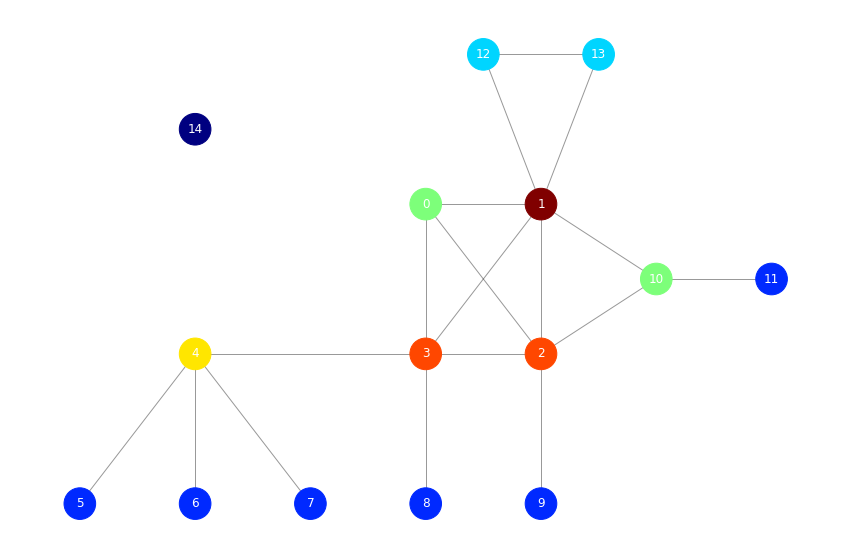

In [110]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position

#pos = nx.spring_layout(G,seed=123456789,k=0.3)

pos = {}
pos[0] = [0.00,0.00]
pos[1] = [0.50,0.00]
pos[2] = [0.50,-0.50]
pos[3] = [0.00,-0.50]
pos[4] = [-1.00,-0.50]
pos[5] = [-1.50,-1.00]
pos[6] = [-1.00,-1.00]
pos[7] = [-0.50,-1.00]
pos[8] = [0.00,-1.00]
pos[9] = [0.50,-1.00]
pos[10] = [1.00,-0.25]
pos[11] = [1.50,-0.25]
pos[12] = [0.25,0.50]
pos[13] = [0.75,0.50]
pos[14] = [-1.00,0.25]

# color of nodes
color = list(dict(nx.degree(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
#plt.colorbar(nodes)
#plt.savefig('graphG.png', transparent=True, dpi=300)
plt.show()

In [111]:
color

[3, 6, 5, 5, 4, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0]

In [91]:
# calculo dos cores de cada no

dic_core = nx.core_number(G)
val_core = list(dic_core.values())

set_core = set(dic_core.values())
print(f"Core = {set_core}")

for i in set_core:
    print(i, end= " : ")
    for key, value in dic_core.items():
        if i == dic_core[key]:
            print(key, end=", ")
    print()

Core = {0, 1, 2, 3}
0 : 14, 
1 : 4, 5, 6, 7, 8, 9, 11, 
2 : 10, 12, 13, 
3 : 0, 1, 2, 3, 


In [92]:
# calculo do graus de cada no

dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {0, 1, 2, 3, 4, 5, 6}
0 : 14, 
1 : 5, 6, 7, 8, 9, 11, 
2 : 12, 13, 
3 : 0, 10, 
4 : 4, 
5 : 2, 3, 
6 : 1, 


In [93]:
grau = 0
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nodes: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 14
nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Grau = {1, 2, 3, 4, 5, 6}
1 : 5, 6, 7, 8, 9, 11, 
2 : 12, 13, 
3 : 0, 10, 
4 : 4, 
5 : 2, 3, 
6 : 1, 


In [94]:
grau = 1
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nodes: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 5
removendo node 6
removendo node 7
removendo node 8
removendo node 9
removendo node 11
nodes: [0, 1, 2, 3, 4, 10, 12, 13]
Grau = {1, 2, 3, 4, 6}
1 : 4, 
2 : 10, 12, 13, 
3 : 0, 
4 : 2, 3, 
6 : 1, 


In [95]:
grau = 1
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nodes: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 4
nodes: [0, 1, 2, 3, 10, 12, 13]
Grau = {2, 3, 4, 6}
2 : 10, 12, 13, 
3 : 0, 3, 
4 : 2, 
6 : 1, 


In [96]:
grau = 2
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nodes: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 10
removendo node 12
removendo node 13
nodes: [0, 1, 2, 3]
Grau = {3}
3 : 0, 1, 2, 3, 


In [97]:
grau = 3
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        print(f"removendo node {key}")
        G.remove_node(key)

print(f"nodes: {G.nodes()}")

# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

removendo node 0
removendo node 1
removendo node 2
removendo node 3
nodes: []
Grau = set()


In [98]:
G = G_copy.copy()

In [99]:
dic_core = nx.core_number(G)
val_core = list(dic_core.values())

set_core = set(dic_core.values())
set_core

{0, 1, 2, 3}

In [100]:
# Visualize the nodes in k-core
# Note that k-core is the all network


for k in set_core:
    print(k, "core:", list(nx.k_core(G,k)))


0 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
2 core: [0, 1, 2, 3, 10, 12, 13]
3 core: [0, 1, 2, 3]


In [101]:
# Visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, 
# however they are not member of (k+1)-core
for k in set_core:
    print(k, "shell:", list(nx.k_shell(G, k)))

0 shell: [14]
1 shell: [4, 5, 6, 7, 8, 9, 11]
2 shell: [10, 12, 13]
3 shell: [0, 1, 2, 3]


In [102]:
# Visualize the nodes in k-crust
for k in set_core:
    print(k, "crust:", list(nx.k_crust(G, k)))

0 crust: [14]
1 crust: [4, 5, 6, 7, 8, 9, 11, 14]
2 crust: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
3 crust: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


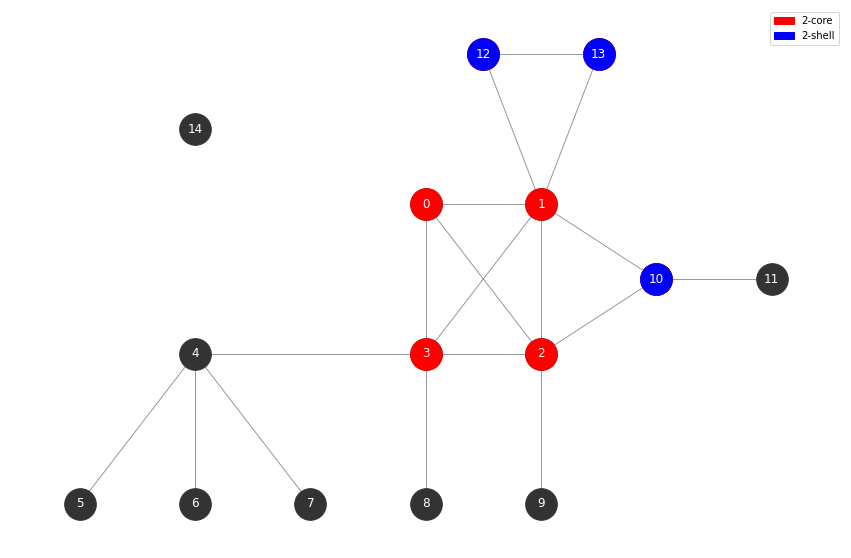

In [103]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# Find k-cores and k-shell
ks = 2
k = 2
k_shell = nx.k_shell(G, ks)
k_core = nx.k_core(G, k)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(k_core,
                               pos=pos,
                               node_size=1000,
                               node_color="red")

# draw nodes
nodes = nx.draw_networkx_nodes(k_shell,
                               pos=pos,
                               node_size=1000,
                               node_color="blue")

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

# static legend
red_patch = mpatches.Patch(color='red', label=f'{ks}-core')
blue_patch = mpatches.Patch(color='blue', label=f'{ks}-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
#plt.savefig('k_core_G', transparent=True,dpi=600)
plt.show()

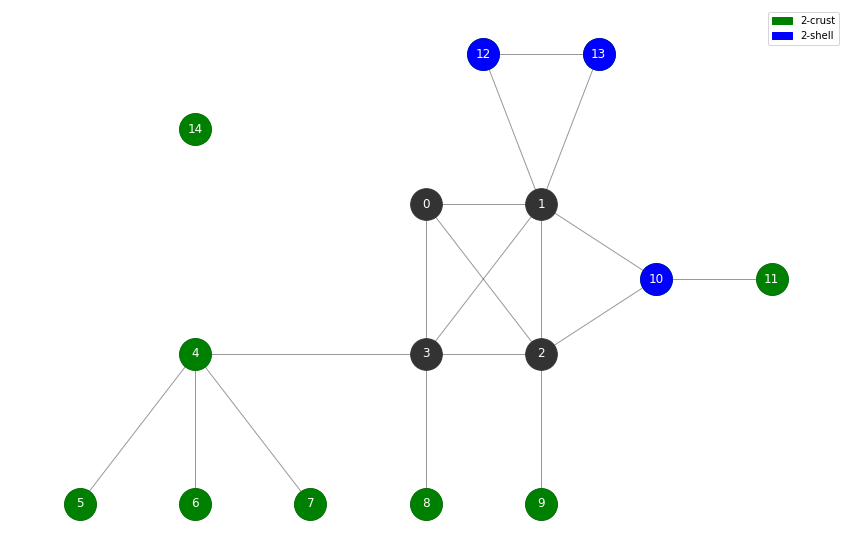

In [104]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# Find k-crust and k-shell
ks = 2
k = 2
k_shell = nx.k_shell(G, ks)
k_crust = nx.k_crust(G, k)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(k_crust,
                               pos=pos,
                               node_size=1000,
                               node_color="green")

# draw nodes
nodes = nx.draw_networkx_nodes(k_shell,
                               pos=pos,
                               node_size=1000,
                               node_color="blue")

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

# static legend
green_patch = mpatches.Patch(color='green', label=f'{k}-crust')
blue_patch = mpatches.Patch(color='blue', label=f'{ks}-shell')
plt.legend(handles=[green_patch,blue_patch])

plt.axis("off")
#plt.savefig('k_crust_shell_G', transparent=True,dpi=600)
plt.show()

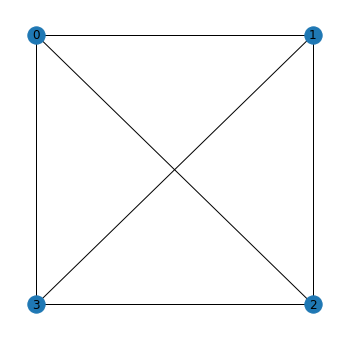

In [107]:
# Subgrafos de shells e de cores

fig, ax = plt.subplots(1,1,figsize=(6,6))

ks = 3
G_shell = nx.core.k_shell(G,ks)
nx.draw(G_shell, pos, with_labels = True)

plt.axis("off")
plt.show()

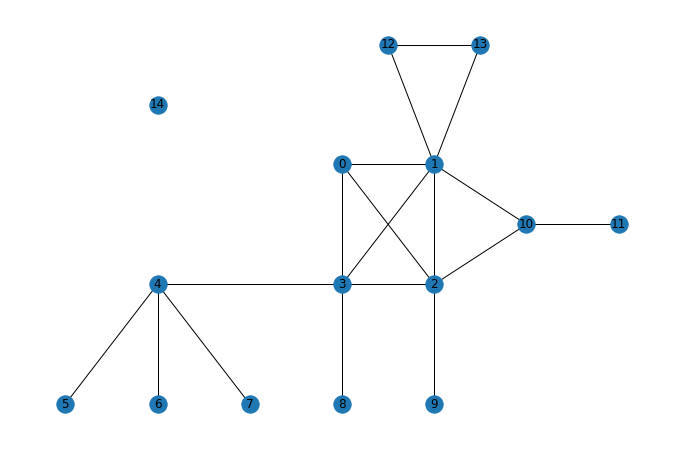

In [108]:
# Subgrafos de shells e de cores

fig, ax = plt.subplots(1,1,figsize=(12,8))

kc = 0 # core number
G_shell = nx.core.k_core(G,kc)
nx.draw(G_shell, pos, with_labels = True)

plt.axis("off")
plt.show()

### Exemplo: grafo de Erdõs Rényi

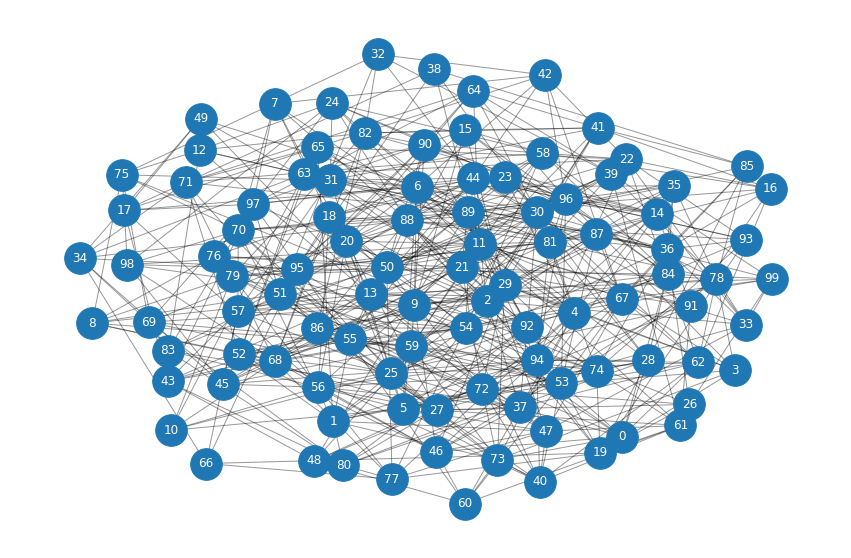

In [446]:
# grafo aleatório de Erdös - Rényi com 100 nós e probabilidade 0.1

ERG = nx.erdos_renyi_graph(100,0.1)
n = ERG.number_of_nodes()
m = ERG.number_of_edges()

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(ERG)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white',
                        ax=ax)

plt.axis("off")
plt.show()

In [ ]:
print(nx.is_connected(ERG))

In [ ]:
print("aresta: ", nx.number_of_edges(ERG))

In [ ]:
# Graus dos vertices
graus = dict(nx.degree(ERG))

for key, value in graus.items():
    print("grau do nó", key, ":", value)

In [ ]:
print(set(graus.values()))

In [ ]:
# Graus de centralidade
grau_center = nx.degree_centrality(ERG)

for key, value in grau_center.items():
    print("grau de centralidade do nó ", key, ":", value)

In [ ]:
print(set(grau_center.values()))

In [ ]:
ec = nx.eccentricity(ERG)

for key, value in ec.items():
    print("excentricidade do nó",key,":", value)


In [ ]:
print(set(ec.values()))

In [ ]:
# gráfico da excentricidade de G

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
#pos = nx.spring_layout(ERG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(ERG)

# color of nodes based on eccentricity
color = list(ec.values())

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG,
                               node_size=1000,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('excentricidade.png', transparent=True,dpi=300)
plt.show()

In [ ]:
# centralidade de excentricidade
cec = [1.0/ec[i] for i in ec]

#for key, value in ec.items():
#    print("node",key,":", cec[key])

In [ ]:
# centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(cec)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# centralidade de proximidade
cc = nx.closeness_centrality(ERG)

#for key, value in cc.items():
#    print("node",key,":", value)

In [ ]:
# centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(cc.values())

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)
# Find k-crust e k-shell

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# centralidade harmônica
n = nx.number_of_nodes(ERG)
ch = nx.harmonic_centrality(ERG)
chn = [ x /(n - 1) for x in ch] # normalização

#for key, value in ec.items():
#    print("node",key,":", ch[key])

In [ ]:
print(set(ch.values()))

In [ ]:
# centralidade harmonica

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(chn)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# centralidade generalizada

# valores de p
p = np.linspace(-1,50,100)

# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(ERG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros_like(p)

for k in range(p.shape[0]):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(sp.shape[0] - 1))

In [ ]:
for k in range(p.shape[0]):
    print("centralidade generalizada do nó %d: %f" %(k,cp[k]))

In [ ]:
# centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()